<a href="https://colab.research.google.com/github/Rishit605/drug-classification/blob/main/Regression_Model_Building_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/dat/4bioactivity_class_pIC50__4data_pubchem_fp.csv')

# **Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Output Features**

In [ ]:
Y = df.pIC50
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

In [ ]:
X.shape, Y.shape

((133, 881), (133,))

# **Removing Low Variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(133, 200)

# **Train-Test Split(80/20)**

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)

In [ ]:
train_X.shape, train_Y.shape

((106, 200), (106,))

In [ ]:
test_X.shape, test_Y.shape

((27, 200), (27,))

# **Building a Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(500)

model = RandomForestRegressor(n_estimators=500)
model.fit(train_X, train_Y)
r2 = model.score(test_X, test_Y)
r2

0.1464033672743955

In [ ]:
Y_pred = model.predict(test_X)

# **Plotting Actual VS Predictions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

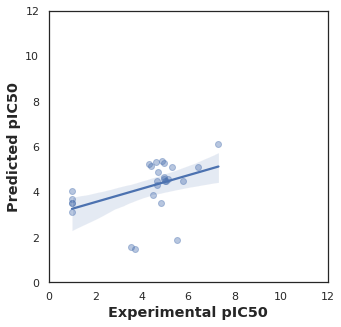

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(test_Y, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show